<div align="right"><a href="https://github.com/lucasliano/TC2">TCII Github</a></div>

<div align="center">
    <h1>Tarea</h1>
    <h2>Filtros 3er Orden con OTAs</h2>
    <h3>Liaño, Lucas</h3>
</div>

## Consigna 

> El ejercicio consiste en diseñar un filtro que cumpla la plantilla que a continuación se presenta y implementarlo con una topología determinada:
>
>|     |     |
>|----------------|----------|
>| $\alpha_{min}$ | $20dB$   |
>| $\alpha_{max}$ | $0.5dB$  |
>| $f_{p}$   | $1kHz$   |
>| $f_{s}$   | $3.2kHz$ |



# Resolución a Mano


![obligatorio1](obligatorio1.png)
![obligatorio2](obligatorio2.png)
![obligatorio2](obligatorio3.png)
![obligatorio2](obligatorio4.png)



# Simulación circuital

---

## Circuito Normalizado

Ver que cumple que para $f = 159mHz$ (equivalente a $\omega = 1$) se cumple que la transferencia cae $3dB$.

![CircuitoNormalizado](CircuitoNormalizado.png)

---

## Circuito Desnomalizado

### Valor en $\omega_{p}$
![Circuito-wp](Circuito-wp.png)

### Valor en $\omega_{B}$
![Circuito-wb](Circuito-wb.png)

### Valor en $\omega_{s}$
![Circuito-ws](Circuito-ws.png)


## Implementación Computarizada

En esta sección vamos a encontrar el código de python correspondiente para generar el diagrama de bode y diagrama de polos y ceros para la transferencia del filtro de 3er orden.

#### Importamos las librerias a utilizar

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from splane import pzmap, grpDelay, bodePlot, convert2SOS
from scipy import signal

# Esta es una liberia tomada de la comunidad [https://stackoverflow.com/questions/35304245/multiply-scipy-lti-transfer-functions?newreg=b12c460c179042b09ad75c2fb4297bc9]
from ltisys import *

# Módulos para Jupyter (mejores graficos!)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower

#### Inicializamos las variables utilizadas

Cargamos los valores de los componentes del circuitos que aparecen en la expresión de la transferencia.

In [22]:
# Constantes del circuito
gm = 212e-6 #212uS
R = 4.7e3   #4.7k
C = 23.8e-9 #23.8nf

# Constantes del filtro
wo = 1/(R3*C)
Q = R2/R3
K = -R3/R1

## Definimos la transferencia a partir de la expresión hallada

Consideremos que a partir del diseño nos quedaron las siguientes expresiones:

\begin{equation}
    gm_{1} = gm_{2} = gm_{3} = \dfrac{1}{R}
\end{equation}

\begin{equation}
    C_{1}=C_{2}=C_{3}
\end{equation}



### Transferencia $H_{1}(S)$
$ H_{1}(S) = \dfrac{\frac{gm}{C}}{S + \frac{G}{C}}$
### Transferencia $H_{2}(S)$
$ H_{2}(S) = \dfrac{\frac{gm^2}{C^2}}{s^2 + s\ (\frac{gm}{C}) + \frac{gm^2}{C^2}}$

In [23]:
# Genero la función transferencia H1 en S
num_pasa_bajos = [gm / C]
den_pasa_bajos = [1, 1/(R*C)]
H1 = ltimul(num_pasa_bajos, den_pasa_bajos);


# Genero la función transferencia pasa banda en S
num_pasa_banda = [gm**2 / (C**2)]
den_pasa_banda = [1, gm/C, gm**2 / (C**2)]
H2 = ltimul(num_pasa_banda, den_pasa_banda);

## Diagrama de polos y ceros

### Transferencia $H_{1}(S)$

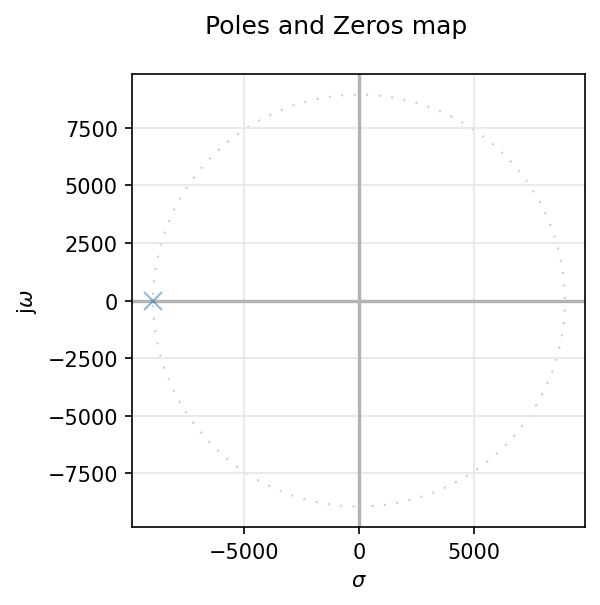

In [24]:
pzmap(H1, 1);

### Transferencia $H_{2}(S)$

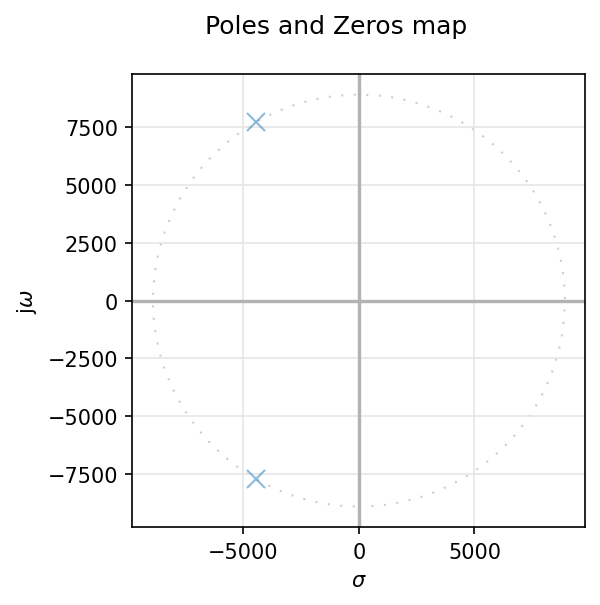

In [28]:
pzmap(H2, 1);

### Transferencia $H(S) = H_{1}(S) \cdot H_{2}(S)$
<div class="alert alert-success">
    <strong>Nota:</strong> Estamos utilizando una nueva librería (ver en los imports) que permite multiplicar funciones de transferencia.
</div>


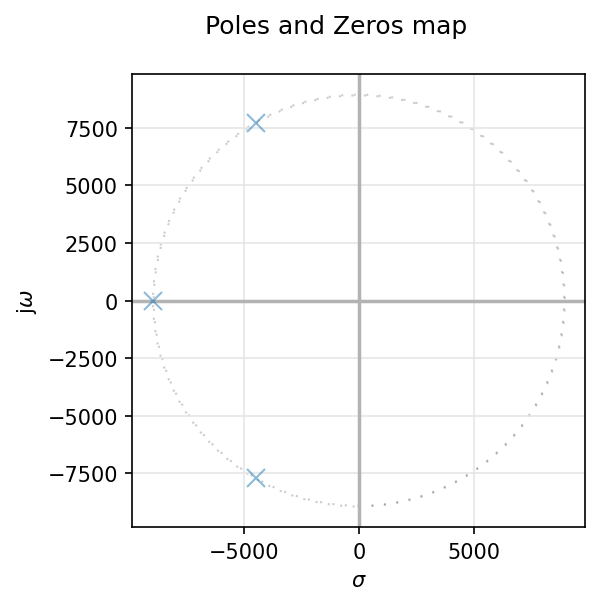

In [26]:
H = H1 * H2
pzmap(H, 1);

## Diagrama de Bode

### Transferencia $H_{1}(S)$

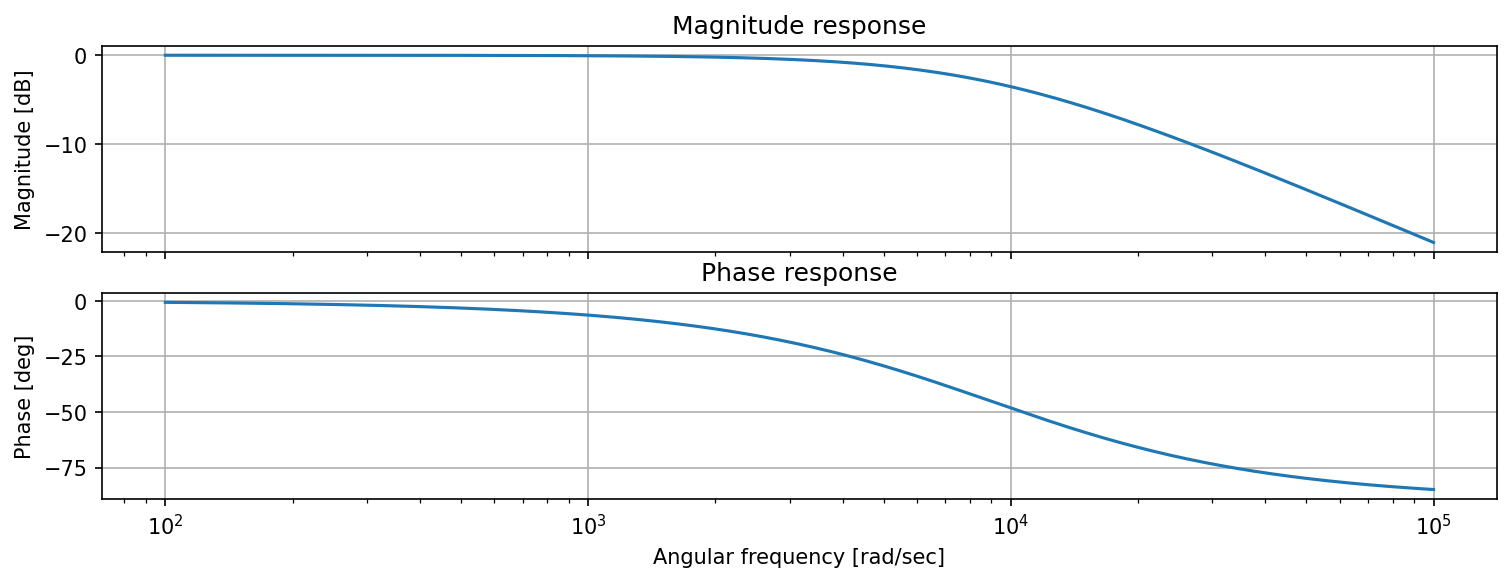

In [35]:
bodePlot(H1.to_ss(), 2);

### Transferencia $H_{2}(S)$

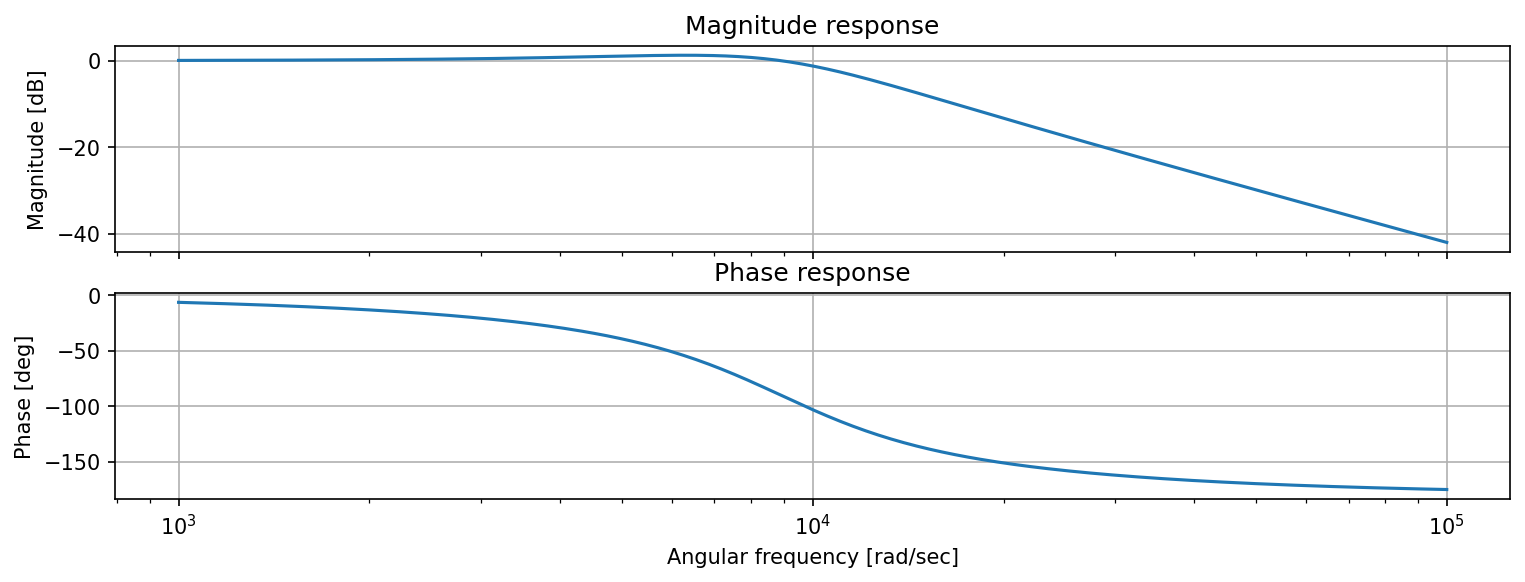

In [36]:
bodePlot(H2.to_ss()Transferencia, 2);

### Transferencia $H(S) = H_{1}(S) \cdot H_{2}(S)$

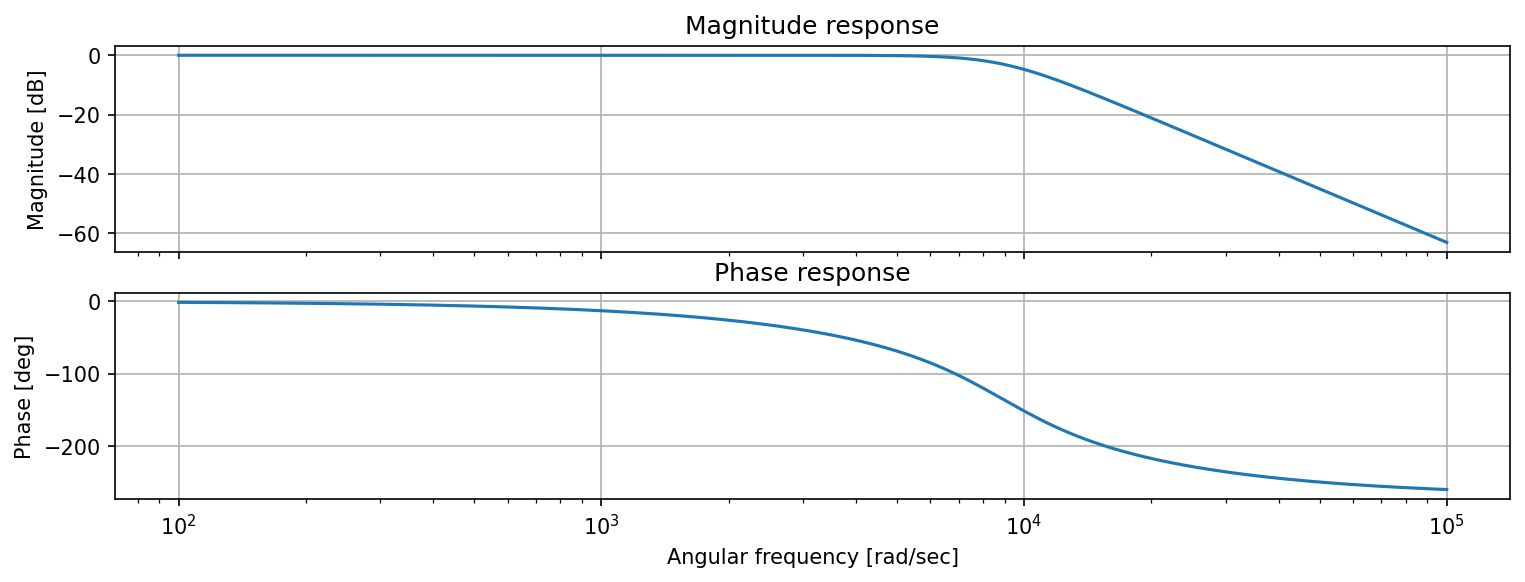

In [37]:
bodePlot(H.to_ss(), 2);